<h1><center>Shopee : Marketing Analysis</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

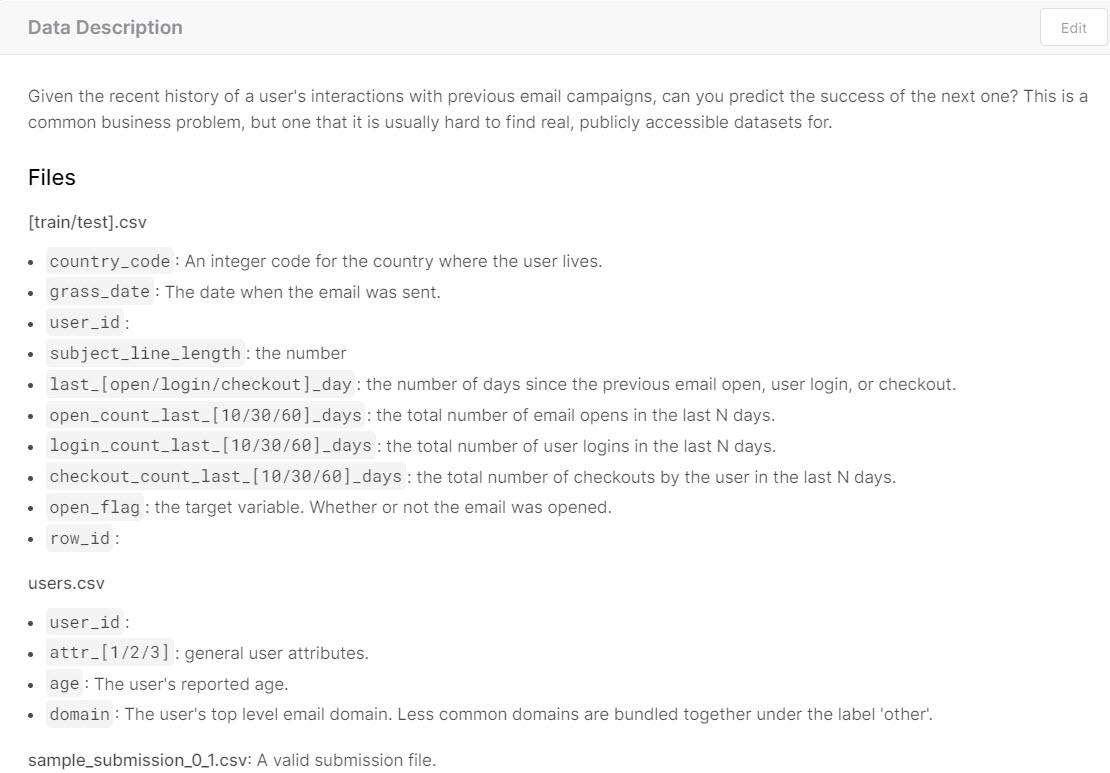

In [1]:
from IPython.display import Image
Image(filename='diagram/Data_description.JPG')

# Data Exploration Analysis (EDA)

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import utils
from datetime import date

import warnings
warnings.filterwarnings("ignore")

## Define Functions

In [2]:
def dummy(X, col_name):
    dummy_df = pd.get_dummies(X[col_name], prefix=col_name)
    X = X.join(dummy_df)
    X.drop(col_name, axis=1, inplace=True)

    return X

def maxOfNever(df, col_name):
    return df[df[col_name].str.find('Never')==-1][col_name].astype('int64').max()

def rowsWithValues(df, col_name):
    return df[df[col_name].str.find('Never')==-1][col_name].astype('int64')

def updateNever(df, col_name, value):
    df.loc[df[col_name].str.find('Never')==0,col_name] = value

## Reading in the dataset

Reading User data

In [3]:
#Read the csv file 
user_df = pd.read_csv('data/users.csv')

In [4]:
user_df

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com
...,...,...,...,...,...,...
127881,127921,NaN,1.0,0.0,NaN,@yahoo.com
127882,127922,1.0,1.0,0.0,20.0,@gmail.com
127883,127923,NaN,1.0,0.0,NaN,@gmail.com
127884,127924,NaN,0.0,0.0,NaN,@gmail.com


In [5]:
user_df.shape

(127886, 6)

In [6]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


#### Checking for null data :
- age and attr_1 contribute to about 40% null data

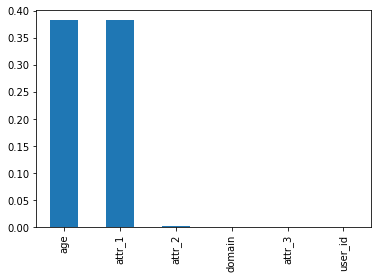

In [7]:
user_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

In [8]:
user_df['attr_1'].fillna((user_df['attr_1'].mean()), inplace=True)
user_df['age'].fillna((user_df['age'].mean()), inplace=True)
user_df['attr_2'].fillna((user_df['attr_2'].mean()), inplace=True)

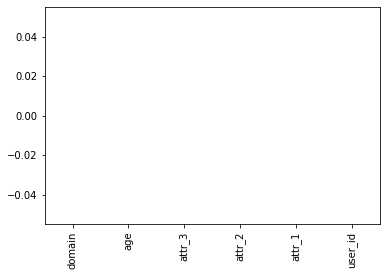

In [9]:
user_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

In [10]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   127886 non-null  float64
 2   attr_2   127886 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      127886 non-null  float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


reading trainng data

In [11]:
#Read the csv file 
test_df = pd.read_csv('data/test.csv')

In [12]:
test_df

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,6,2019-09-29 00:00:00+08:00,127348,53,Never open,4,8,0,0,0,0,0,0,0,0,0,55965
55966,6,2019-09-29 00:00:00+08:00,127396,53,59,802,1207,0,0,1,0,0,0,0,0,0,55966
55967,6,2019-09-29 00:00:00+08:00,127574,43,Never open,7,Never checkout,0,0,0,0,0,0,0,0,0,55967
55968,6,2019-09-29 00:00:00+08:00,127887,43,5,5,6,2,5,14,0,0,0,0,0,0,55968


In [13]:
test_df.shape

(55970, 17)

In [14]:
test_df.columns

Index(['country_code', 'grass_date', 'user_id', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'row_id'],
      dtype='object')

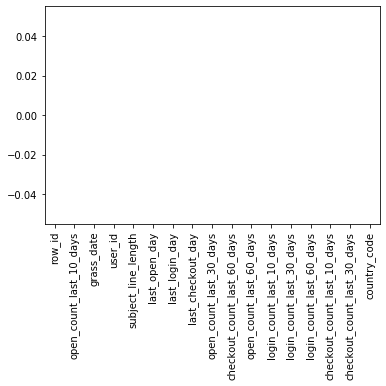

In [15]:
test_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

### Merge User ID data with testing data

Merge for dataset 1 & 2

In [16]:
testing_df = pd.merge(left=user_df, right=test_df, left_on=['user_id'], right_on='user_id')
testing_df.shape

(55970, 22)

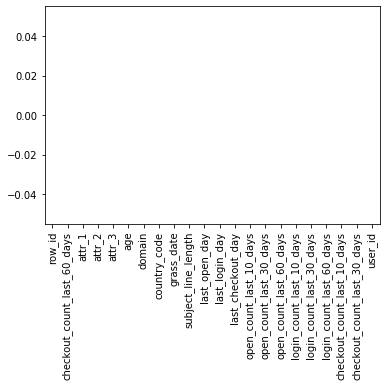

In [17]:
testing_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

In [18]:
testing_df.sort_values(by=['row_id'])

,user_id,attr_1,attr_2,attr_3,age,domain,country_code,grass_date,subject_line_length,last_open_day,...,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,0,0.999823,1.0,0.0,31.370124,@gmail.com,6,2019-09-03 00:00:00+08:00,35,27,...,2,3,4,10,34,134,0,6,18,0
57,130,0.999823,1.0,0.0,31.370124,@gmail.com,6,2019-09-03 00:00:00+08:00,35,7,...,1,1,1,5,5,5,0,0,0,1
64,150,1.000000,1.0,2.0,33.000000,@gmail.com,5,2019-09-03 00:00:00+08:00,25,34,...,0,0,0,13,19,38,2,2,2,2
79,181,1.000000,1.0,2.0,22.000000,@yahoo.com,1,2019-09-03 00:00:00+08:00,36,63,...,0,0,0,43,110,173,2,5,5,3
81,192,0.999823,1.0,0.0,31.370124,@gmail.com,5,2019-09-03 00:00:00+08:00,23,6,...,0,0,0,4,12,39,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55717,127348,0.999823,1.0,0.0,31.370124,@gmail.com,6,2019-09-29 00:00:00+08:00,53,Never open,...,0,0,0,0,0,0,0,0,0,55965
55735,127396,0.999823,1.0,0.0,31.370124,@gmail.com,6,2019-09-29 00:00:00+08:00,53,59,...,0,0,1,0,0,0,0,0,0,55966
55812,127574,0.999823,1.0,0.0,31.370124,@hotmail.com,6,2019-09-29 00:00:00+08:00,43,Never open,...,0,0,0,0,0,0,0,0,0,55967
55951,127887,0.999823,1.0,0.0,31.370124,@gmail.com,6,2019-09-29 00:00:00+08:00,43,5,...,2,5,14,0,0,0,0,0,0,55968


### Create new features and convert to date format for date feature
### Encode Category feature

In [19]:
testing_df['grass_date']=pd.to_datetime(testing_df['grass_date'])
testing_df['weekday'] = testing_df['grass_date'].apply(lambda x: x.weekday())
# Drop useless features
testing_df = testing_df.drop(['domain', 'country_code','attr_2'], axis=1)

In [20]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55970 entries, 0 to 55969
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype                                
---  ------                       --------------  -----                                
 0   user_id                      55970 non-null  int64                                
 1   attr_1                       55970 non-null  float64                              
 2   attr_3                       55970 non-null  float64                              
 3   age                          55970 non-null  float64                              
 4   grass_date                   55970 non-null  datetime64[ns, pytz.FixedOffset(480)]
 5   subject_line_length          55970 non-null  int64                                
 6   last_open_day                55970 non-null  object                               
 7   last_login_day               55970 non-null  object                               
 8   last_c

In [21]:
testing_df.describe(include='all')

,user_id,attr_1,attr_3,age,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,weekday
count,55970.000000,55970.000000,55970.000000,55970.000000,55970,55970.000000,55970,55970,55970,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.00000,55970.000000
unique,NaN,NaN,NaN,NaN,26,NaN,491,829,898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,2019-09-09 00:00:00+08:00,NaN,Never open,1,Never checkout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,8034,NaN,7589,8647,11403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2019-09-03 00:00:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-09-29 00:00:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,65049.007790,0.999861,1.085778,31.306376,NaN,42.212703,NaN,NaN,NaN,0.774272,2.441880,5.323530,8.978899,26.289459,50.713882,1.124674,3.219385,5.933893,27984.50000,2.472986
std,37934.945847,0.008453,1.035913,8.912187,NaN,12.276136,NaN,NaN,NaN,1.752984,4.786883,9.053473,13.975840,38.572656,73.289199,3.500704,8.197445,14.233715,16157.29162,1.966321
min,0.000000,0.000000,0.000000,0.000000,NaN,11.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32293.250000,0.999823,0.000000,27.000000,NaN,35.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,13992.25000,1.000000


Check max value for the replacement for the text 

In [22]:
print('last_open_day:',maxOfNever(testing_df, 'last_open_day'))
print('last_login_day:',maxOfNever(testing_df, 'last_login_day'))
print('last_checkout_day:',maxOfNever(testing_df, 'last_checkout_day'))

last_open_day: 812
last_login_day: 18165
last_checkout_day: 1462


Replace with max value 

In [23]:
updateNever(testing_df, 'last_open_day', 1000)
updateNever(testing_df, 'last_login_day', 20000)
updateNever(testing_df, 'last_checkout_day', 2000)

In [24]:
testing_df['last_open_day']=testing_df['last_open_day'].astype('int64')
testing_df['last_login_day']=testing_df['last_login_day'].astype('int64')
testing_df['last_checkout_day']=testing_df['last_checkout_day'].astype('int64')

In [26]:
testing_df['last_login_day']=testing_df['last_login_day'].astype('int64')
testing_df.loc[(testing_df.last_login_day > 1500),'last_login_day']=1445
testing_df

,user_id,attr_1,attr_3,age,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,weekday
0,0,0.999823,0.0,31.370124,2019-09-03 00:00:00+08:00,35,27,2,13,2,3,4,10,34,134,0,6,18,0,1
1,1,1.000000,2.0,50.000000,2019-09-05 00:00:00+08:00,38,30,2,2,0,1,3,17,42,84,1,3,5,5859,3
2,3,0.999823,0.0,31.370124,2019-09-09 00:00:00+08:00,37,8,19,2000,1,3,4,0,1,1,0,0,0,19311,0
3,5,1.000000,1.0,30.000000,2019-09-10 00:00:00+08:00,45,28,2,222,0,1,1,43,149,331,0,0,3,27345,1
4,6,1.000000,2.0,32.000000,2019-09-09 00:00:00+08:00,50,1,2,5,3,9,15,38,89,153,2,4,6,19312,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,127914,0.999823,0.0,31.370124,2019-09-09 00:00:00+08:00,45,18,16,23,0,1,2,0,0,0,0,0,0,27343,0
55966,127915,0.999823,0.0,31.370124,2019-09-23 00:00:00+08:00,52,1000,1,4,0,0,0,0,0,0,0,0,0,48058,0
55967,127919,0.999823,0.0,31.370124,2019-09-09 00:00:00+08:00,44,5,485,2000,2,3,4,0,0,0,0,0,0,27344,0
55968,127921,0.999823,0.0,31.370124,2019-09-06 00:00:00+08:00,32,11,9,2000,0,5,13,0,0,0,0,0,0,12641,4


In [27]:
testing_df.describe(include='all')

,user_id,attr_1,attr_3,age,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,weekday
count,55970.000000,55970.000000,55970.000000,55970.000000,55970,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.00000,55970.000000
unique,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,2019-09-09 00:00:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,8034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2019-09-03 00:00:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-09-29 00:00:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,65049.007790,0.999861,1.085778,31.306376,NaN,42.212703,163.805753,48.659067,462.736895,0.774272,2.441880,5.323530,8.978899,26.289459,50.713882,1.124674,3.219385,5.933893,27984.50000,2.472986
std,37934.945847,0.008453,1.035913,8.912187,NaN,12.276136,334.727036,133.583541,785.758315,1.752984,4.786883,9.053473,13.975840,38.572656,73.289199,3.500704,8.197445,14.233715,16157.29162,1.966321
min,0.000000,0.000000,0.000000,0.000000,NaN,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32293.250000,0.999823,0.000000,27.000000,NaN,35.000000,7.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,13992.25000,1.000000


In [28]:
testing_df.columns

Index(['user_id', 'attr_1', 'attr_3', 'age', 'grass_date',
       'subject_line_length', 'last_open_day', 'last_login_day',
       'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'row_id',
       'weekday'],
      dtype='object')

In [29]:
train_df_copy = testing_df.copy()

In [30]:
testing_df.to_csv('data/testing_dataset5_for_submission.csv',index=False)

### Create 2 datasets
- 1. Datasets dropping nulls row in column attr_1, age & attr_2
- 2. Datasets dropping column attr_1 and age


#### Dataset 1 : Drop empty rows data in column attr_1 and age

In [31]:
# Drop useless features
X = testing_df.drop(['grass_date', 'user_id'], axis=1)

In [32]:
X = X.sort_values(by=['row_id'])
X

,attr_1,attr_3,age,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,weekday
0,0.999823,0.0,31.370124,35,27,2,13,2,3,4,10,34,134,0,6,18,0,1
57,0.999823,0.0,31.370124,35,7,5,383,1,1,1,5,5,5,0,0,0,1,1
64,1.000000,2.0,33.000000,25,34,1,3,0,0,0,13,19,38,2,2,2,2,1
79,1.000000,2.0,22.000000,36,63,5,5,0,0,0,43,110,173,2,5,5,3,1
81,0.999823,0.0,31.370124,23,6,5,54,0,0,0,4,12,39,0,0,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55717,0.999823,0.0,31.370124,53,1000,4,8,0,0,0,0,0,0,0,0,0,55965,6
55735,0.999823,0.0,31.370124,53,59,802,1207,0,0,1,0,0,0,0,0,0,55966,6
55812,0.999823,0.0,31.370124,43,1000,7,2000,0,0,0,0,0,0,0,0,0,55967,6
55951,0.999823,0.0,31.370124,43,5,5,6,2,5,14,0,0,0,0,0,0,55968,6


In [33]:
X.to_csv('data/test_dataset5.csv',index=False)

In [34]:
X.shape

(55970, 18)